In [1]:
from examples.train_model import main
import torch 
import importlib
from examples.benchmark import local_get_args
from utils.rng import set_seed
from examples.train_and_visu_non_recurrent import evaluate_config
import matplotlib.pyplot as plt
import numpy as np
import os 
import geopandas as gpd

def plot_heatmap(M, title=None):
    plt.imshow(M, cmap='hot', interpolation='nearest', aspect='auto')
    plt.colorbar()
    if title:
        plt.title(title)
    plt.show()


station = ['PAR']
target_data = 'subway_in' # 'subway_in' # 
model_name = 'STAEformer' # 'STGCN', 'ASTGCN' # 'STGformer' #'STAEformer' # 'DSTRformer'

config_file = importlib.import_module(f"constants.config_by_datasets.{target_data}.{model_name}")
importlib.reload(config_file)
modification = config_file.config
SEED = config_file.SEED

modification.update({'num_workers' : 4, # 0,1,2, 4, 6, 8 ... A l'IDRIS ils bossent avec 6 num workers par A100 80GB
                    'persistent_workers' : True ,# False 
                    'pin_memory' : True ,# False 
                    'prefetch_factor' : 4, # None, 2,3,4,5 ... 
                    'drop_last' : False,  # True
                    'mixed_precision' : False, # True # False
                    'torch_compile' : False, # 'compile' # 'jit_script' #'trace' # False
                    'device': torch.device('cuda:0'),
                    'epochs': 40
})

args_init = local_get_args(model_name,
                args_init = None,
                dataset_names=modification['dataset_names'],
                dataset_for_coverage=modification['dataset_for_coverage'],
                modification = modification)

set_seed(SEED)


# Run the script
fold_to_evaluate=[args_init.K_fold-1]

if False:
    trial_id = f"{args_init.model_name}_{'_'.join(args_init.dataset_names)}_fold_{str(fold_to_evaluate[0])}_epochs_{args_init.epochs}"
    save_folder = f"K_fold_validation/training_wo_HP_tuning/{trial_id}"
    print(f"Save folder: {save_folder}")
    trainer,ds,model,args = main(fold_to_evaluate,save_folder,modification)

training_mode_to_visualise = ['test'] # ['test','valid','train']
(trainer,ds,ds_no_shuffle,args) = evaluate_config(args_init=args_init,
                                                  modification=modification,
                                                  fold_to_evaluate= fold_to_evaluate,
                                                  station=station,
                                                   training_mode_to_visualise=training_mode_to_visualise,
                                                   type_POIs = ['iris','iris','iris'],#['iris','iris','iris','iris','iris'],  #'stadium'
                                                   spatial_units = ['Charmettes', 'Charles Hernu', 'Les Brotteaux'], #['Charmettes', 'Charles Hernu', 'Les Brotteaux', 'Bellecombe-Thiers', 'Tonkin Sud'],  #'Matmut Stadium Gerland',
                                                   apps = ['Deezer'], #['Instagram','Google_Maps','Twitter'],
                                                   POI_or_stations = ['POI','POI','POI'],#['POI','POI','POI','POI','POI',], #'POI',
                                                   transfer_modes =['DL'], #['DL','UL'],
                                                   expanded= '',
                                                   individual_poi = False,
                                                   sum_ts_pois = True
                                                   )

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training and Hyper-parameter tuning with Ray is not possible

----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2819, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([939, 40, 7])

 Loading calendar inputs ...

>>>Tackle Contextual dataset:  netmob_POIs
Netmob_T.size():  torch.Size([7392, 430])
Restraining all datasets to train common dates: 2819 dates
Restraining all datasets to valid common dates: 940 dates
Restraining all datasets to test common dates: 939 dates
kwargs_i: {'compute_node_attr_with_attn': True, 'stacked_contextual': True, 'NetMob_selected_apps': ['De

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 23     Train Loss: 21.391614907174382 Val Loss: 26.01432630660686
Epoch: 27     Train Loss: 19.95213096689019 Val Loss: 26.08545731077803
Epoch: 32     Train Loss: 18.78150210696867 Val Loss: 23.890332980866127
Epoch: 36     Train Loss: 18.012753993748518 Val Loss: 25.253838502599837
Epoch: 40     Train Loss: 17.455248941974293 Val Loss: 25.573114890240607

Training Throughput:705.73 sequences per seconds
>>> Training complete in: 0:03:20.343563
>>> Training (58.14%) performance time: min 0.02 avg 2.18e-02 seconds (+/- 2.60e-03)
>>> Loading (35.96%) performance time: min 0.00 avg 1.39e-02 seconds (+/- 5.52e-02)
>>> Forward  (24.64%) performance time: 9.37e-03 seconds (+/- 1.12e-03)
>>> Backward  (33.32%) performance time: 1.29e-02 seconds (+/- 1.89e-03)
>>> Plotting  (0.00%) performance time: 9.30e-06 seconds (+/- 2.86e-05)
>>> Saving  (6.07%) performance time: 9.66e-01 seconds (+/- 2.64e-01)
>>> PI-tracking  (0.00%) performance time: 8.28e-06 seconds (+/- 7.65e-06)
>>> Schedule

ERROR 1: PROJ: proj_create_from_database: Open of /root/anaconda3/envs/pytorch-2.0.1/share/proj failed


Loading BokehJS ...

## Analyse attn weights

In [2]:
X = torch.cat([x for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Y = torch.cat([y for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Xc0 = torch.cat([x_c[0] for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Xc1 = torch.cat([x_c[1] for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
Xc2 = torch.cat([x_c[2] for x,y,x_c  in trainer.dataloader['test']]).to(args_init.device)
pred = trainer.model(X,[Xc0,Xc1,Xc2])
test_attn_weights = trainer.model.spatial_attn_poi.netmob_POIs.attn_weight

# Heat map visualisation of attn weight: 
## Average Spatial Attention Weights: 

In [3]:
netmob_folder = '../../../../data/rrochas/prediction_validation/POIs'
tag = 'iris'
app = 'Deezer'
geojson_path = f"{netmob_folder}/gdf_{tag}.geojson"
L_osmid = [osmid[3:12] for osmid in os.listdir(f"{netmob_folder}/netmob_POI_Lyon/{tag}/{app}") if 'DL' in osmid]

print(f'Osmid associated to the tag {tag}')
# Load gdf :
gdf = gpd.read_file(geojson_path).drop(columns = ['type','sub_type'])
gdf.osmid = gdf.osmid.astype(int).astype(str)

# init : 
head = 0 
station_name = station[0]

Osmid associated to the tag iris


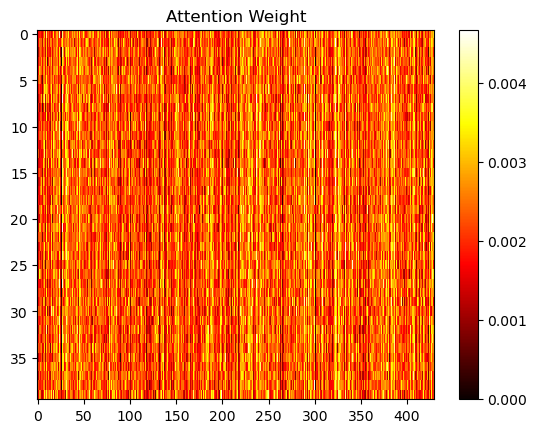

Visualisation of the attention weight for the station: PAR averaged on all time-slots  and head 0 out of 2


In [4]:
# Average Attention Weight : 
average_attn_weight = test_attn_weights.mean(0)   # [heads, stations, Iris]
plot_heatmap(average_attn_weight[0].detach().cpu().numpy(), title='Attention Weight')


# Visualisation : 
station_ind = list(ds.spatial_unit).index(station_name)
attn_weight_i = average_attn_weight[head,station_ind,:]
print(f'Visualisation of the attention weight for the station: {station_name} averaged on all time-slots  and head {head} out of {average_attn_weight.size(0)}')
gdf['attn_weight'] = attn_weight_i.detach().cpu().numpy()
gdf.explore('attn_weight',cmpa = 'hot')

## Attention Weight on Weekday and Evening Peak Hour: 

In [5]:
# tod contains float between 0 and 1, representing the time of day in % 
tod = Xc1[:,-1]

# Get tensors indices where tod > 7/24 and tod < 10/24
indices_tod = torch.where((tod > 17/24) & (tod < 19/24))[0]

# dow contains integers between 0 and 6, representing the day of the week (0 = Monday, 6 = Sunday)
dow = Xc1[:,-1].long()
# Get tensors indices where dow is a working day:
indices_dow = torch.where((dow >= 0) & (dow <= 4))[0]

evening_hours = list(set(indices_dow.detach().cpu().numpy()) & set(indices_tod.detach().cpu().numpy()))
print(f"Number of time-slots associated to evening hour within test-dataset: {len(evening_hours)}")

Number of time-slots associated to evening hour within test-dataset: 97


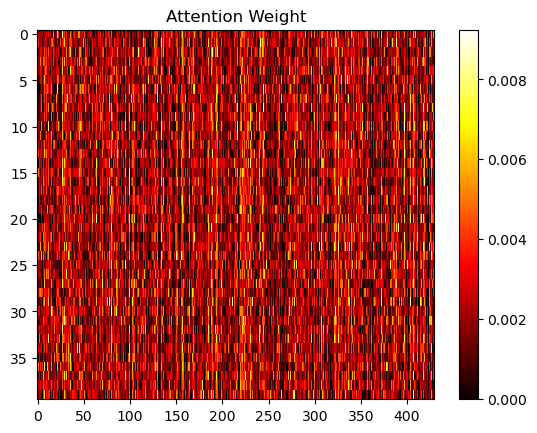

Visualisation of the attention weight for the station: PAR averaged on all time-slots  and head 0 out of 2


In [6]:
# Average Morning Attention Weight : 
evening_attn_weight = torch.index_select(test_attn_weights, 0, torch.tensor(evening_hours).to(test_attn_weights).long()).mean(0)

plot_heatmap(evening_attn_weight[head].detach().cpu().numpy(), title='Attention Weight')


# Visualisation : 
station_ind = list(ds.spatial_unit).index(station_name)
attn_weight_i = evening_attn_weight[0,station_ind,:]
print(f'Visualisation of the attention weight for the station: {station_name} averaged on all time-slots  and head {head} out of {evening_attn_weight.size(0)}')
gdf['attn_weight'] = attn_weight_i.detach().cpu().numpy()
gdf.explore('attn_weight',cmpa = 'hot')

## Attention Weight on Weekday and Morning Peak Hour: 

In [7]:
# tod contains float between 0 and 1, representing the time of day in % 
tod = Xc1[:,-1]

# Get tensors indices where tod > 7/24 and tod < 10/24
indices_tod = torch.where((tod > 7/24) & (tod < 9.5/24))[0]

# dow contains integers between 0 and 6, representing the day of the week (0 = Monday, 6 = Sunday)
dow = Xc1[:,-1].long()
# Get tensors indices where dow is a working day:
indices_dow = torch.where((dow >= 0) & (dow <= 4))[0]

morning_hours = list(set(indices_dow.detach().cpu().numpy()) & set(indices_tod.detach().cpu().numpy()))
print(f"Number of time-slots associated to morning hour within test-dataset: {len(morning_hours)}")

Number of time-slots associated to morning hour within test-dataset: 108


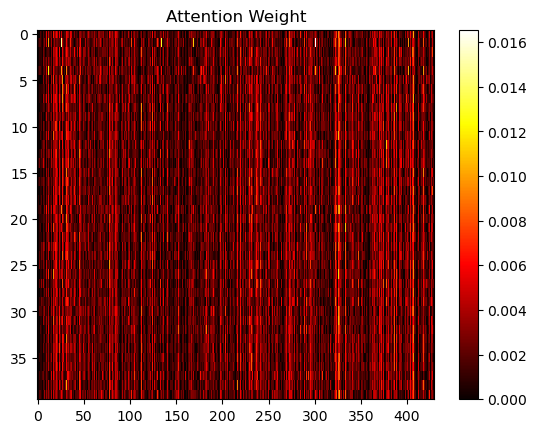

Visualisation of the attention weight for the station: PAR averaged on all time-slots  and head 0 out of 2


In [8]:
# Average Morning Attention Weight : 
morning_attn_weight = torch.index_select(test_attn_weights, 0, torch.tensor(morning_hours).to(test_attn_weights).long()).mean(0)

plot_heatmap(morning_attn_weight[head].detach().cpu().numpy(), title='Attention Weight')


# Visualisation : 
station_ind = list(ds.spatial_unit).index(station_name)
attn_weight_i = morning_attn_weight[0,station_ind,:]
print(f'Visualisation of the attention weight for the station: {station_name} averaged on all time-slots  and head {head} out of {morning_attn_weight.size(0)}')
gdf['attn_weight'] = attn_weight_i.detach().cpu().numpy()
gdf.explore('attn_weight',cmpa = 'hot')

##  Attention Weight at Monday 8:30am :

Lundi 8h30m


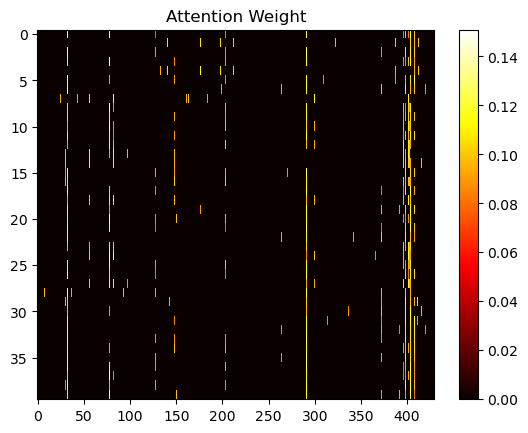

Visualisation of the attention weight for the station: PAR  at time slot: 310 and head 0 out of 2


In [9]:
timeslot = 310

dow = int(Xc0[timeslot,-1].item())
tod = Xc1[timeslot,-1]*24
h = int(tod)
days = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
print(f"{days[dow]} {h}h{int((tod-h)*60)}m")

attn_weight = test_attn_weights[timeslot]
plot_heatmap(attn_weight[0].detach().cpu().numpy(), title='Attention Weight')

# Visualisation : 
station_ind = list(ds.spatial_unit).index(station_name)
attn_weight_i = attn_weight[head,station_ind,:]
print(f'Visualisation of the attention weight for the station: {station_name}  at time slot: {timeslot} and head {head} out of {average_attn_weight.size(0)}')
gdf['attn_weight'] = attn_weight_i.detach().cpu().numpy()
gdf.explore('attn_weight',cmpa = 'hot')